https://www.kaggle.com/code/yuvashribhanuprakash/london-crime-data

https://becominghuman.ai/london-crime-data-analysis-part-i-9b7062081f9a

https://medium.com/data-science-community-srm/london-crimes-15a371c5af99

https://www.kaggle.com/code/mattkay123/london-crime-bigquery-and-python/notebook

https://towardsdatascience.com/crime-location-analysis-and-prediction-using-python-and-machine-learning-1d8db9c8b6e6

# Libraries

In [ ]:
!pip install geopandas --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 82.0 MB/s eta 0:00:00


In [ ]:
!pip install pysal --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 69.5 MB/s eta 0

In [ ]:
!pip install geoplot --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 109.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import glob
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import pysal
#from pysal.spreg import ols
#from pysal.spreg import ml_error
#from pysal.spreg import ml_lag
import fiona
import shapely
from shapely.geometry import Point, Polygon
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
%matplotlib inline
from scipy import stats
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster, FastMarkerCluster

import seaborn as sns
import plotly.graph_objects as go
import geoplot
import geoplot.crs as gcrs
from shapely.geometry import Point, Polygon
import plotly.express as px
import geoplot as gplt
import geoplot.crs as gcrs
import warnings

#warnings.filterwarnings("ignore")

In [ ]:
# Link Google Drive account
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Merge and save dataset

Field	Meaning (https://data.police.uk/about/#columns)

* **Reported by**	
The force that provided the data about the crime.
* **Falls within**	
At present, also the force that provided the data about the crime. This is currently being looked into and is likely to change in the near future.
* **Longitude** and **Latitude**	
The anonymised coordinates of the crime. See Location Anonymisation for more information.
* **LSOA code** and **LSOA name**	
References to the Lower Layer Super Output Area that the anonymised point falls into, according to the LSOA boundaries provided by the Office for National Statistics.
* **Crime type**	
One of the crime types listed in the Police.UK FAQ.
* **Last outcome category**	
A reference to whichever of the outcomes associated with the crime occurred most recently. For example, this crime's 'Last outcome category' would be 'Formal action is not in the public interest'.
* **Context**	
A field provided for forces to provide additional human-readable data about individual crimes. Currently, for newly added CSVs, this is always empty.

In [ ]:
path = '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/'

In [ ]:
#import shutil
#zipfile = path + 'Crimes/2019-12.zip'
#unzip_to = path + 'Crimes/2019/'
#shutil.unpack_archive(zipfile, unzip_to)

In [ ]:
#zipfile = '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013-12.zip'
#unzip_to = path + 'Crimes/2013/'
#shutil.unpack_archive(zipfile, unzip_to)

## 2019

In [ ]:
base_path = '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/'

In [ ]:
csv_list = []
for i in range(1, 13):
  if (i < 10):
    path = base_path + '2019-0' + str(i) + '/'
    csv_list.append(glob.glob(path + "/*.csv"))
  else:
    path = base_path + '2019-' + str(i) + '/'
    csv_list.append(glob.glob(path + "/*.csv"))
print(csv_list)

csv_files = []
for i in range(len(csv_list)):
  for n in range(len(csv_list[i])):
    csv_files.append(csv_list[i][n])
# csv_files
len(csv_files)

[['/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-01-avon-and-somerset-street.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-01-avon-and-somerset-outcomes.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-01-avon-and-somerset-stop-and-search.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-01-bedfordshire-street.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-01-bedfordshire-outcomes.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-01-bedfordshire-stop-and-search.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-01-btp-street.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-01-btp-stop-and-search.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2019/2019-01/2019-

1530

In [ ]:
df_list = (pd.read_csv(file) for file in csv_files)
df_2019 = pd.concat(df_list, ignore_index=True)
df_2019

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,NaN,2019-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98096d1a69205691a56b89c1182eadd6aaf15400ea18da...,2019-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.513308,51.409456,On or near Charlton Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5a3fabdacf5411a33532d431e3ca53fcd2fc717c9adb9d...,2019-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.513308,51.409456,On or near Charlton Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ff4f0e48783cad8622ba0c1894e01cd5bb7958c42f9a3f...,2019-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Other theft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3c9e5d2c746cf74a54aaf057f966ef51a07a709e6a6fdc...,2019-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Other theft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11272070,NaN,NaN,NaN,NaN,-2.217670,51.303063,NaN,NaN,NaN,NaN,...,NaN,Male,18-24,White - Any other White background,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,True
11272071,NaN,NaN,NaN,NaN,-2.172532,51.204614,NaN,NaN,NaN,NaN,...,NaN,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
11272072,NaN,NaN,NaN,NaN,-2.173152,51.202185,NaN,NaN,NaN,NaN,...,NaN,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
11272073,NaN,NaN,NaN,NaN,-1.660594,51.234409,NaN,NaN,NaN,NaN,...,NaN,Male,18-24,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False


In [ ]:
df_2019.to_csv('df_2019_originale.csv')
!cp df_2019_originale.csv "/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/"

## 2013

In [ ]:
base_path = '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/'

In [ ]:
csv_list = []
for i in range(1, 13):
  if (i < 10):
    path = base_path + '2013-0' + str(i) + '/'
    csv_list.append(glob.glob(path + "/*.csv"))
  else:
    path = base_path + '2013-' + str(i) + '/'
    csv_list.append(glob.glob(path + "/*.csv"))
print(csv_list)

csv_files = []
for i in range(len(csv_list)):
  for n in range(len(csv_list[i])):
    csv_files.append(csv_list[i][n])
# csv_files
len(csv_files)

[['/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-avon-and-somerset-street.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-avon-and-somerset-outcomes.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-bedfordshire-street.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-bedfordshire-outcomes.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-btp-street.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-cambridgeshire-street.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-cambridgeshire-outcomes.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-cheshire-street.csv', '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/2013/2013-01/2013-01-cheshire-outcomes.

1056

In [ ]:
df_list = (pd.read_csv(file) for file in csv_files)
df_2013 = pd.concat(df_list, ignore_index=True)
df_2013

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Outcome type
0,NaN,2013-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.513308,51.409456,On or near Charlton Road,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN,NaN
1,6f7fa8cbee02eb1b4084c495cea9183a1241bd9d9bef3c...,2013-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511761,51.409966,On or near Caernarvon Close,E01014399,Bath and North East Somerset 001A,Burglary,Under investigation,NaN,NaN
2,c7e6d0e19c6ea0318e14ec92093fe5f7b0190f5cee7357...,2013-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Other theft,No further action at this time,NaN,NaN
3,NaN,2013-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN,NaN
4,NaN,2013-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498613,51.416002,On or near High Street,E01014400,Bath and North East Somerset 001B,Anti-social behaviour,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505563,66773b89675a0f8fee8117afe2e993efa9348a1e1e8a36...,2013-12,Wiltshire Police,Wiltshire Police,-1.769408,51.568884,On or near Petrol Station,E01015479,Swindon 017A,NaN,NaN,NaN,Court case unable to proceed
9505564,a7968bcfcf95f4c93e069f992a5d1fa9475c3b38e38309...,2013-12,Wiltshire Police,Wiltshire Police,-1.775722,51.552442,On or near WOOD STREET,E01015534,Swindon 024B,NaN,NaN,NaN,Offender given suspended prison sentence
9505565,b3dc0b3fd9d6c9707e3d352b3c04bbfc0cfd94c8387ea8...,2013-12,Wiltshire Police,Wiltshire Police,-1.787214,51.562219,On or near Shopping Area,E01015476,Swindon 015B,NaN,NaN,NaN,Court case unable to proceed
9505566,3594e9f2ec88f7ebdef1a5c3ffd86bb7349012abacd1f8...,2013-12,Wiltshire Police,Wiltshire Police,-2.202783,51.316676,On or near Supermarket,E01032094,Wiltshire 035C,NaN,NaN,NaN,Offender fined


In [ ]:
df_2013.to_csv('df_2013_originale.csv')
!cp df_2013_originale.csv "/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/"

# Preprocessing

In [ ]:
path = '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/'

## 2019

In [ ]:
df_2019 = pd.read_csv(path + 'df_2019_originale.csv', low_memory=False)

In [ ]:
df_2019.shape

(11272075, 27)

In [ ]:
print("To check if any colun has null values")
print(df_2019.isnull().any())

To check if any colun has null values
Unnamed: 0                                  False
Crime ID                                     True
Month                                        True
Reported by                                  True
Falls within                                 True
Longitude                                    True
Latitude                                     True
Location                                     True
LSOA code                                    True
LSOA name                                    True
Crime type                                   True
Last outcome category                        True
Context                                      True
Outcome type                                 True
Type                                         True
Date                                         True
Part of a policing operation                 True
Policing operation                           True
Gender                                       True
Age range   

In [ ]:
print(df_2019['Longitude'].isnull().sum())
print(df_2019['Latitude'].isnull().sum())

366318
366318


In [ ]:
# delete rows
indexNames = df_2019[df_2019['Longitude'].isnull()].index
df_2019.drop(indexNames , inplace=True)

In [ ]:
# delete rows
indexNames = df_2019[df_2019['LSOA code'].isnull()].index
df_2019.drop(indexNames , inplace=True)

In [ ]:
df_2019.drop(['Crime ID', 'Falls within', 'Unnamed: 0', 'Context'], inplace=True, axis=1)
# show dataframe columns
df_2019.columns 

Index(['Month', 'Reported by', 'Longitude', 'Latitude', 'Location',
       'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category',
       'Outcome type', 'Type', 'Date', 'Part of a policing operation',
       'Policing operation', 'Gender', 'Age range', 'Self-defined ethnicity',
       'Officer-defined ethnicity', 'Legislation', 'Object of search',
       'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [ ]:
print(sum(df_2019['Last outcome category'].isnull()))
print(sum(df_2019['Outcome type'].isnull()))
print(sum(df_2019['Type'].isnull()))
print(sum(df_2019['Date'].isnull()))
print(sum(df_2019['Part of a policing operation'].isnull()))
print(sum(df_2019['Policing operation'].isnull()))
print(sum(df_2019['Gender'].isnull()))
print(sum(df_2019['Age range'].isnull()))
print(sum(df_2019['Self-defined ethnicity'].isnull()))
print(sum(df_2019['Officer-defined ethnicity'].isnull()))
print(sum(df_2019['Legislation'].isnull()))
print(sum(df_2019['Object of search'].isnull()))
print(sum(df_2019['Outcome'].isnull()))
print(sum(df_2019['Removal of more than just outer clothing'].isnull()))

5442306
6183750
10317407
10317407
10317407
10317407
10317407
10317407
10317407
10317407
10317407
10317407
10317407
10317407


In [ ]:
len(df_2019)

10317407

In [ ]:
df_2019.drop(['Outcome type', 'Type', 'Date', 'Part of a policing operation', 'Policing operation', 
              'Gender', 'Age range', 'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation', 
              'Object of search', 'Outcome', 'Removal of more than just outer clothing', 
              'Outcome linked to object of search'], inplace=True, axis=1)

In [ ]:
df_2019 = df_2019.dropna(subset=["Crime type", "LSOA code", "Last outcome category"])

In [ ]:
print("To check if any colun has null values")
print(df_2019.isnull().any())

To check if any colun has null values
Month                    False
Reported by              False
Longitude                False
Latitude                 False
Location                 False
LSOA code                False
LSOA name                False
Crime type               False
Last outcome category    False
dtype: bool


In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4875101 entries, 1 to 11268955
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Month                  object 
 1   Reported by            object 
 2   Longitude              float64
 3   Latitude               float64
 4   Location               object 
 5   LSOA code              object 
 6   LSOA name              object 
 7   Crime type             object 
 8   Last outcome category  object 
dtypes: float64(2), object(7)
memory usage: 371.9+ MB


In [ ]:
# Now check the name of the fields and rename the columns by more python recognized names...
colnames = ['month', 'reported_by', 'lon', 'lat', 'location', 'LSOA_code', 'LSOA_name', 'type', 'Last outcome category']
df_2019.columns = colnames
df_2019.head(4)

,month,reported_by,lon,lat,location,LSOA_code,LSOA_name,type,Last outcome category
1,2019-01,Avon and Somerset Constabulary,-2.513308,51.409456,On or near Charlton Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable
2,2019-01,Avon and Somerset Constabulary,-2.513308,51.409456,On or near Charlton Road,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable
3,2019-01,Avon and Somerset Constabulary,-2.509126,51.416137,On or near St Francis Road,E01014399,Bath and North East Somerset 001A,Other theft,Status update unavailable
4,2019-01,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Other theft,Status update unavailable


In [ ]:
len(df_2019)

863071

Seleziono LSOA di Londra

In [ ]:
search_values = ['City of London', 'Barking and Dagenham','Barnet','Bexley',
'Brent','Bromley','Camden','Croydon','Ealing','Enfield','Greenwich','Hackney','Hammersmith and Fulham',
'Haringey','Harrow','Havering','Hillingdon','Hounslow','Islington','Kensington and Chelsea','Kingston upon Thames',
'Lambeth','Lewisham','Merton','Newham','Redbridge','Richmond upon Thames','Southwark','Sutton','Tower Hamlets', 
'Waltham Forest','Wandsworth','Westminster']
df_2019 = df_2019[df_2019['LSOA_name'].str.contains('|'.join(search_values))]

In [ ]:
# Get names of indexes for which column Stock has value No
indexNames = df_2019[ df_2019['LSOA_name'].str.contains('Brentwood')].index
# Delete these row indexes from dataFrame
df_2019.drop(indexNames, inplace=True)

In [ ]:
df_2019.head()

,month,reported_by,lon,lat,location,LSOA_code,LSOA_name,type,Last outcome category
5691,2019-01,Avon and Somerset Constabulary,-0.139304,51.525235,On or near Supermarket,E01000946,Camden 021B,Bicycle theft,Status update unavailable
27286,2019-01,Bedfordshire Police,-0.079809,51.663560,On or near Supermarket,E01001411,Enfield 004B,Violence and sexual offences,Action to be taken by another organisation
27288,2019-01,Bedfordshire Police,0.187051,51.582121,On or near Petrol Station,E01002353,Havering 013B,Violence and sexual offences,Unable to prosecute suspect
39549,2019-01,Cambridgeshire Constabulary,-0.248182,51.535472,On or near Acton Lane,E01033485,Brent 031H,Violence and sexual offences,Status update unavailable
39550,2019-01,Cambridgeshire Constabulary,-0.248182,51.535472,On or near Acton Lane,E01033485,Brent 031H,Violence and sexual offences,Status update unavailable


In [ ]:
df_2019['LSOA_code'].unique()

array(['E01000946', 'E01001411', 'E01002353', ..., 'E01004276',
       'E01001867', 'E01003044'], dtype=object)

In [ ]:
lista = df_2019['LSOA_code'].unique()
lsoa = []
for i in range(len(lista)):
  lsoa.append(lista[i])

np.set_printoptions(threshold=len(lista))
print(lsoa)

['E01000946', 'E01001411', 'E01002353', 'E01033485', 'E01003825', 'E01000914', 'E01000001', 'E01000002', 'E01000003', 'E01000005', 'E01032739', 'E01032740', 'E01001843', 'E01033708', 'E01002724', 'E01033490', 'E01002704', 'E01003693', 'E01004307', 'E01004288', 'E01032767', 'E01004293', 'E01004735', 'E01001408', 'E01002448', 'E01000033', 'E01000114', 'E01000331', 'E01000715', 'E01000863', 'E01001507', 'E01001848', 'E01002036', 'E01002307', 'E01002638', 'E01003197', 'E01003745', 'E01003747', 'E01003724', 'E01003660', 'E01003702', 'E01003670', 'E01003760', 'E01032772', 'E01032782', 'E01004349', 'E01004345', 'E01004436', 'E01004622', 'E01000027', 'E01000249', 'E01000247', 'E01000169', 'E01000253', 'E01000230', 'E01000127', 'E01000212', 'E01000307', 'E01000898', 'E01001446', 'E01001552', 'E01001547', 'E01001551', 'E01001448', 'E01001409', 'E01001517', 'E01001423', 'E01001427', 'E01002071', 'E01002112', 'E01002225', 'E01002106', 'E01002190', 'E01002156', 'E01002130', 'E01002182', 'E01002248'

Inserisco colonna `borough`

In [ ]:
df_2019['borough'] = df_2019['LSOA_name'].str[:-5]

In [ ]:
df_2019.head()

,month,reported_by,lon,lat,location,LSOA_code,LSOA_name,type,Last outcome category,borough
5691,2019-01,Avon and Somerset Constabulary,-0.139304,51.525235,On or near Supermarket,E01000946,Camden 021B,Bicycle theft,Status update unavailable,Camden
27286,2019-01,Bedfordshire Police,-0.079809,51.663560,On or near Supermarket,E01001411,Enfield 004B,Violence and sexual offences,Action to be taken by another organisation,Enfield
27288,2019-01,Bedfordshire Police,0.187051,51.582121,On or near Petrol Station,E01002353,Havering 013B,Violence and sexual offences,Unable to prosecute suspect,Havering
39549,2019-01,Cambridgeshire Constabulary,-0.248182,51.535472,On or near Acton Lane,E01033485,Brent 031H,Violence and sexual offences,Status update unavailable,Brent
39550,2019-01,Cambridgeshire Constabulary,-0.248182,51.535472,On or near Acton Lane,E01033485,Brent 031H,Violence and sexual offences,Status update unavailable,Brent


In [ ]:
df_2019.to_csv('df_2019.csv')
!cp df_2019.csv "/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/"

## 2013

In [ ]:
df_2013 = pd.read_csv(path + 'df_2013_originale.csv', low_memory=False)

In [ ]:
df_2013.shape

(9505568, 14)

In [ ]:
print("To check if any colun has null values")
print(df_2013.isnull().any())

To check if any colun has null values
Unnamed: 0               False
Crime ID                  True
Month                    False
Reported by              False
Falls within             False
Longitude                 True
Latitude                  True
Location                 False
LSOA code                 True
LSOA name                 True
Crime type                True
Last outcome category     True
Context                   True
Outcome type              True
dtype: bool


In [ ]:
print(df_2013['Longitude'].isnull().sum())
print(df_2013['Latitude'].isnull().sum())

116100
116100


In [ ]:
# delete rows
indexNames = df_2013[df_2013['Longitude'].isnull()].index
df_2013.drop(indexNames , inplace=True)

In [ ]:
# delete rows
indexNames = df_2013[df_2013['LSOA code'].isnull()].index
df_2013.drop(indexNames , inplace=True)

In [ ]:
df_2013.drop(['Crime ID', 'Falls within', 'Unnamed: 0', 'Context', 'Outcome type'], inplace=True, axis=1)
# show dataframe columns
df_2013.columns 

Index(['Month', 'Reported by', 'Longitude', 'Latitude', 'Location',
       'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category'],
      dtype='object')

In [ ]:
print(df_2013.isnull().any())

Month                    False
Reported by              False
Longitude                False
Latitude                 False
Location                 False
LSOA code                False
LSOA name                False
Crime type                True
Last outcome category     True
dtype: bool


In [ ]:
print(sum(df_2013['Last outcome category'].isnull()))
print(sum(df_2013['Crime type'].isnull()))
len(df_2013)

5846912
3700532


9227066

In [ ]:
df_2013 = df_2013.dropna(subset=["Crime type", "LSOA code", "Last outcome category"])

In [ ]:
print(sum(df_2013['Last outcome category'].isnull()))
print(sum(df_2013['Crime type'].isnull()))
len(df_2013)

0
0


3380154

In [ ]:
print(len(df_2013['Last outcome category']))
print(df_2013['Last outcome category'].isnull().sum())

3380154
0


In [ ]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3380154 entries, 1 to 9503106
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Month                  object 
 1   Reported by            object 
 2   Longitude              float64
 3   Latitude               float64
 4   Location               object 
 5   LSOA code              object 
 6   LSOA name              object 
 7   Crime type             object 
 8   Last outcome category  object 
dtypes: float64(2), object(7)
memory usage: 257.9+ MB


In [ ]:
# Now check the name of the fields and rename the columns by more python recognized names...
colnames = ['month', 'reported_by', 'lon', 'lat', 'location', 'LSOA_code', 'LSOA_name', 'type', 'Last outcome category']
df_2013.columns = colnames
df_2013.head(4)

,month,reported_by,lon,lat,location,LSOA_code,LSOA_name,type,Last outcome category
1,2013-01,Avon and Somerset Constabulary,-2.511761,51.409966,On or near Caernarvon Close,E01014399,Bath and North East Somerset 001A,Burglary,Under investigation
2,2013-01,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Other theft,No further action at this time
7,2013-01,Avon and Somerset Constabulary,-2.500214,51.416481,On or near Parking Area,E01014400,Bath and North East Somerset 001B,Burglary,No further action at this time
8,2013-01,Avon and Somerset Constabulary,-2.504298,51.417785,On or near St Dunstans Close,E01014400,Bath and North East Somerset 001B,Burglary,No further action at this time


In [ ]:
search_values = ['City of London', 'Barking and Dagenham','Barnet','Bexley',
'Brent','Bromley','Camden','Croydon','Ealing','Enfield','Greenwich','Hackney','Hammersmith and Fulham',
'Haringey','Harrow','Havering','Hillingdon','Hounslow','Islington','Kensington and Chelsea','Kingston upon Thames',
'Lambeth','Lewisham','Merton','Newham','Redbridge','Richmond upon Thames','Southwark','Sutton','Tower Hamlets', 
'Waltham Forest','Wandsworth','Westminster']
df_2013 = df_2013[df_2013['LSOA_name'].str.contains('|'.join(search_values))]

In [ ]:
# Get names of indexes for which column Stock has value No
indexNames = df_2013[ df_2013['LSOA_name'].str.contains('Brentwood')].index
# Delete these row indexes from dataFrame
df_2013.drop(indexNames, inplace=True)

In [ ]:
df_2013.head()

,month,reported_by,lon,lat,location,LSOA_code,LSOA_name,type,Last outcome category
56887,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Under investigation
56888,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,No further action at this time
56889,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,No further action at this time
56890,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Under investigation
56899,2013-01,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Other theft,No further action at this time


In [ ]:
df_2013['LSOA_code'].unique()

array(['E01000914', 'E01000001', 'E01000002', ..., 'E01000834',
       'E01002256', 'E01001526'], dtype=object)

In [ ]:
lista = df_2013['LSOA_code'].unique()
lsoa = []
for i in range(len(lista)):
  lsoa.append(lista[i])

np.set_printoptions(threshold=len(lista))
print(lsoa)

['E01000914', 'E01000001', 'E01000002', 'E01000003', 'E01000005', 'E01032739', 'E01032740', 'E01001874', 'E01001876', 'E01002726', 'E01033490', 'E01002704', 'E01004307', 'E01004250', 'E01004293', 'E01000111', 'E01001552', 'E01001551', 'E01002438', 'E01000375', 'E01000378', 'E01000379', 'E01000027', 'E01000028', 'E01000029', 'E01000030', 'E01000031', 'E01000032', 'E01000110', 'E01000112', 'E01000113', 'E01000034', 'E01000037', 'E01000038', 'E01000039', 'E01000063', 'E01000100', 'E01000101', 'E01000109', 'E01000114', 'E01000033', 'E01000060', 'E01000061', 'E01000062', 'E01000064', 'E01000065', 'E01000078', 'E01000080', 'E01000081', 'E01000082', 'E01000083', 'E01000102', 'E01000021', 'E01000022', 'E01000023', 'E01000024', 'E01000025', 'E01000077', 'E01000015', 'E01000016', 'E01000017', 'E01000018', 'E01000079', 'E01000035', 'E01000036', 'E01000107', 'E01000108', 'E01000066', 'E01000067', 'E01000069', 'E01000070', 'E01000071', 'E01000057', 'E01000073', 'E01000074', 'E01000075', 'E01000076'

Inserisco colonna `borough`

In [ ]:
df_2013['borough'] = df_2013['LSOA_name'].str[:-5]

In [ ]:
df_2013.head()

,month,reported_by,lon,lat,location,LSOA_code,LSOA_name,type,Last outcome category,borough
56887,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Under investigation,Camden
56888,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,No further action at this time,Camden
56889,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,No further action at this time,Camden
56890,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Under investigation,Camden
56899,2013-01,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Other theft,No further action at this time,City of London


Cambiare il type di:

* 'Public disorder and weapons' → 'Public order'

* 'Violent crime' → 'Violence and sexual offences' (motivazione: https://www.cps.gov.uk/crime-info/violent-crime)

Così sia 2019 che 2013 hanno le stesse categorie.

In [ ]:
df_2019 = pd.read_csv(path + 'df_2019.csv', low_memory=False)
crimes_2019 = df_2019['type'].sort_values().unique()
crimes_2019, len(crimes_2019)

(array(['Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs',
        'Other crime', 'Other theft', 'Possession of weapons',
        'Public order', 'Robbery', 'Shoplifting', 'Theft from the person',
        'Vehicle crime', 'Violence and sexual offences'], dtype=object),
 13)

In [ ]:
crimes_2013 = df_2013['type'].sort_values().unique()
crimes_2013, len(crimes_2013)

(array(['Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs',
        'Other crime', 'Other theft', 'Possession of weapons',
        'Public disorder and weapons', 'Public order', 'Robbery',
        'Shoplifting', 'Theft from the person', 'Vehicle crime',
        'Violence and sexual offences', 'Violent crime'], dtype=object),
 15)

In [ ]:
df_2013['type'].mask(df_2013['type'] == 'Public disorder and weapons', 'Public order', inplace=True)
df_2013['type'].mask(df_2013['type'] == 'Violent crime', 'Violence and sexual offences', inplace=True)

In [ ]:
crimes_2013 = df_2013['type'].sort_values().unique()
crimes_2013, len(crimes_2013)

(array(['Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs',
        'Other crime', 'Other theft', 'Possession of weapons',
        'Public order', 'Robbery', 'Shoplifting', 'Theft from the person',
        'Vehicle crime', 'Violence and sexual offences'], dtype=object),
 13)

In [ ]:
df_2013.to_csv('df_2013.csv')
!cp df_2013.csv "/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/"

# EDA - Exploratory Data Analysis

In [ ]:
path = '/content/gdrive/MyDrive/Smart Cities - PROGETTO/Dataset/Crimes/'
df_2019 = pd.read_csv(path + 'df_2019.csv', low_memory=False)
df_2013 = pd.read_csv(path + 'df_2013.csv', low_memory=False)

In [ ]:
df_2019.drop(['Unnamed: 0'], inplace=True, axis=1)
df_2019.head()

,month,reported_by,lon,lat,location,LSOA_code,LSOA_name,type,Last outcome category,borough
0,2019-01,Avon and Somerset Constabulary,-0.139304,51.525235,On or near Supermarket,E01000946,Camden 021B,Bicycle theft,Status update unavailable,Camden
1,2019-01,Bedfordshire Police,-0.079809,51.663560,On or near Supermarket,E01001411,Enfield 004B,Violence and sexual offences,Action to be taken by another organisation,Enfield
2,2019-01,Bedfordshire Police,0.187051,51.582121,On or near Petrol Station,E01002353,Havering 013B,Violence and sexual offences,Unable to prosecute suspect,Havering
3,2019-01,Cambridgeshire Constabulary,-0.248182,51.535472,On or near Acton Lane,E01033485,Brent 031H,Violence and sexual offences,Status update unavailable,Brent
4,2019-01,Cambridgeshire Constabulary,-0.248182,51.535472,On or near Acton Lane,E01033485,Brent 031H,Violence and sexual offences,Status update unavailable,Brent


In [ ]:
df_2013.drop(['Unnamed: 0'], inplace=True, axis=1)
df_2013.head()

,month,reported_by,lon,lat,location,LSOA_code,LSOA_name,type,Last outcome category,borough
0,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Under investigation,Camden
1,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,No further action at this time,Camden
2,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,No further action at this time,Camden
3,2013-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Under investigation,Camden
4,2013-01,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Other theft,No further action at this time,City of London


In [ ]:
print(len(df_2019['LSOA_name'].unique()))
print(len(df_2013['LSOA_name'].unique()))

4831
4831


In [ ]:
# print all crime variables in the "type" column
crimes_2019 = df_2019['type'].sort_values().unique()
crimes_2019, len(crimes_2019)

(array(['Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs',
        'Other crime', 'Other theft', 'Possession of weapons',
        'Public order', 'Robbery', 'Shoplifting', 'Theft from the person',
        'Vehicle crime', 'Violence and sexual offences'], dtype=object),
 13)

In [ ]:
crimes_2013 = df_2013['type'].sort_values().unique()
crimes_2013, len(crimes_2013)

(array(['Bicycle theft', 'Burglary', 'Criminal damage and arson', 'Drugs',
        'Other crime', 'Other theft', 'Possession of weapons',
        'Public order', 'Robbery', 'Shoplifting', 'Theft from the person',
        'Vehicle crime', 'Violence and sexual offences'], dtype=object),
 13)

In [ ]:
# numero di crimini per tipologia
crime_data_group_2019 = df_2019.groupby('type').size().reset_index(name='count')
crime_data_sort_2019 = crime_data_group_2019.sort_values(['count'], ascending=False).reset_index(drop=True)
crime_data_sort_2019

,type,count
0,Violence and sexual offences,226352
1,Other theft,124255
2,Vehicle crime,116647
3,Burglary,79304
4,Criminal damage and arson,53117
5,Theft from the person,52350
6,Public order,49643
7,Drugs,43804
8,Shoplifting,43749
9,Robbery,38436


In [ ]:
crime_data_group_2013 = df_2013.groupby('type').size().reset_index(name='count')
crime_data_sort_2013 = crime_data_group_2013.sort_values(['count'], ascending=False).reset_index(drop=True)
crime_data_sort_2013

,type,count
0,Other theft,136234
1,Violence and sexual offences,134048
2,Vehicle crime,91270
3,Burglary,87800
4,Criminal damage and arson,55541
5,Drugs,46522
6,Shoplifting,37221
7,Theft from the person,29828
8,Robbery,29709
9,Public order,27278


Tipologia di crimini

In [ ]:
crime_type_totals_2019 = df_2019.groupby(['month','type']).size().reset_index(name='count')
crime_type_totals_2019

,month,type,count
0,2019-01,Bicycle theft,1275
1,2019-01,Burglary,7483
2,2019-01,Criminal damage and arson,4563
3,2019-01,Drugs,3226
4,2019-01,Other crime,811
...,...,...,...
151,2019-12,Robbery,3173
152,2019-12,Shoplifting,3466
153,2019-12,Theft from the person,4385
154,2019-12,Vehicle crime,10278


In [ ]:
fig = px.pie(crime_type_totals_2019, values='count', names='type', 
             title='Proportion of Each Type of Crime for Year 2019', width=800)
fig.show()

In [ ]:
crime_type_totals_2013 = df_2013.groupby(['month','type']).size().reset_index(name='count')
crime_type_totals_2013

,month,type,count
0,2013-01,Burglary,8486
1,2013-01,Criminal damage and arson,4532
2,2013-01,Drugs,4143
3,2013-01,Other crime,3855
4,2013-01,Other theft,14835
...,...,...,...
139,2013-12,Robbery,2056
140,2013-12,Shoplifting,3002
141,2013-12,Theft from the person,3278
142,2013-12,Vehicle crime,7018


In [ ]:
fig = px.pie(crime_type_totals_2013, values='count', names='type', 
             title='Proportion of Each Type of Crime for Year 2013', width=800)
fig.show()

In [ ]:
sum_crimes_2019 = df_2019.groupby(['type']).size().reset_index(name = 'count')
sum_crimes_2019 = sum_crimes_2019.sort_values(by='count')
sum_crimes_2019

,type,count
6,Possession of weapons,6451
4,Other crime,10223
0,Bicycle theft,18740
8,Robbery,38436
9,Shoplifting,43749
3,Drugs,43804
7,Public order,49643
10,Theft from the person,52350
2,Criminal damage and arson,53117
1,Burglary,79304


In [ ]:
fig = px.histogram(sum_crimes_2019, x="count", y="type", text_auto='.2s',
            title="Count of The Crime Type - 2019", height=600)
fig.update_layout(yaxis_title="Crime Type")
fig.update_layout(xaxis_title="Number of Crime")
fig.show()

In [ ]:
sum_crimes_2013 = df_2013.groupby(['type']).size().reset_index(name = 'count')
sum_crimes_2013 = sum_crimes_2013.sort_values(by='count')
sum_crimes_2013

,type,count
6,Possession of weapons,2165
4,Other crime,12748
0,Bicycle theft,14334
7,Public order,27278
8,Robbery,29709
10,Theft from the person,29828
9,Shoplifting,37221
3,Drugs,46522
2,Criminal damage and arson,55541
1,Burglary,87800


In [ ]:
fig = px.histogram(sum_crimes_2013, x="count", y="type", text_auto='.2s',
            title="Count of The Crime Type - 2013", height=600)
fig.update_layout(yaxis_title="Crime Type")
fig.update_layout(xaxis_title="Number of Crime")
fig.show()

Analisi della variabile reported_by

In [ ]:
sum_reported_by_2019 = df_2019.groupby(['reported_by']).size().reset_index(name = 'count')
sum_reported_by_2019 = sum_reported_by_2019.sort_values(by='count')
sum_reported_by_2019

,reported_by,count
26,Wiltshire Police,1
12,Lincolnshire Police,1
15,North Yorkshire Police,2
19,South Yorkshire Police,3
25,West Midlands Police,4
23,Warwickshire Police,6
4,Cumbria Constabulary,6
8,Gwent Police,7
18,South Wales Police,8
6,Durham Constabulary,9


In [ ]:
# POCO ESPLICATIVO, sono quasi tutti riportati da Metropolitan Police Service
# (stessa cosa per il 2013)

# fig = px.histogram(sum_reported_by_2019, x="count", y="reported_by", title="Count of Police Service Who Report The Crime", height=900)
# fig.update_layout(yaxis_title="Police Services")
# fig.update_layout(xaxis_title="Number of Report")
# fig.show()

In [ ]:
sum_reported_by_2013 = df_2013.groupby(['reported_by']).size().reset_index(name = 'count')
sum_reported_by_2013 = sum_reported_by_2013.sort_values(by='count')
sum_reported_by_2013

,reported_by,count
4,Gwent Police,1
7,Lancashire Constabulary,1
0,Avon and Somerset Constabulary,2
1,Cambridgeshire Constabulary,2
9,Northamptonshire Police,5
5,Hertfordshire Constabulary,37
3,Essex Police,42
11,Thames Valley Police,69
6,Kent Police,74
10,Surrey Police,74


Analisi delle location

NB. le location sono diverse (2019 ciè hospital e nel 2013 c'è police station), sarebbe più giusto avere le stesse categorie ma le top 3 location appartengono a entrambi gli anni

In [ ]:
sum_location_2019 = df_2019.groupby(['location']).size().reset_index(name = 'count')
sum_location_2019 = sum_location_2019.sort_values(by='count', ascending= False)
sum_location_2019 = sum_location_2019.head(10)
sum_location_2019 = sum_location_2019.sort_values(by='count', ascending= True)
sum_location_2019

,location,count
16167,On or near Hospital,5947
12406,On or near Further/Higher Educational Building,7233
30455,On or near Theatre/Concert Hall,7298
23680,On or near Pedestrian Subway,8797
28240,On or near Sports/Recreation Area,11316
22131,On or near Nightclub,14700
24001,On or near Petrol Station,17226
23446,On or near Parking Area,25391
27554,On or near Shopping Area,26261
29613,On or near Supermarket,35686


In [ ]:
fig = px.histogram(sum_location_2019, x="count", y="location", text_auto='.2s',
            title="Top 10 Location Where Crime Often Occurs - 2019", width=900)
fig.update_layout(yaxis_title="Location")
fig.update_layout(xaxis_title="Count")
fig.show()

In [ ]:
sum_location_2013 = df_2013.groupby(['location']).size().reset_index(name = 'count')
sum_location_2013 = sum_location_2013.sort_values(by='count', ascending= False)
sum_location_2013 = sum_location_2013.head(10)
sum_location_2013 = sum_location_2013.sort_values(by='count', ascending= True)
sum_location_2013

,location,count
24018,On or near Police Station,4770
30071,On or near Theatre/Concert Hall,5777
12296,On or near Further/Higher Educational Building,6015
23385,On or near Pedestrian Subway,6669
27871,On or near Sports/Recreation Area,7808
21856,On or near Nightclub,14287
23694,On or near Petrol Station,18456
27192,On or near Shopping Area,18801
23155,On or near Parking Area,19736
29232,On or near Supermarket,30509


In [ ]:
fig = px.histogram(sum_location_2013, x="count", y="location", text_auto='.2s',
            title="Top 10 Location Where Crime Often Occurs - 2013", width=900)
fig.update_layout(yaxis_title="Location")
fig.update_layout(xaxis_title="Count")
fig.show()

## Analyze Top 3 Location 

### 2019

In [ ]:
df_top3Loc_2019 = df_2019.query("location in ('On or near Supermarket','On or near Shopping Area', 'On or near Parking Area')")

In [ ]:
top3_crime_totals_2019 = df_top3Loc_2019.groupby(['location','type']).size().reset_index(name='count')
top3_crime_totals_2019.head(3)

,location,type,count
0,On or near Parking Area,Bicycle theft,645
1,On or near Parking Area,Burglary,1350
2,On or near Parking Area,Criminal damage and arson,1224


In [ ]:
import plotly.graph_objects as go

fig = px.bar(top3_crime_totals_2019, x="location", y="count", color="type", #text_auto='.2s',
             title="Number of Crimes in top 3 location - 2019", width=800, height=700)

fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Location",
    legend_title="Type of Crime",
    font=dict(family="Arial, monospace", size=14, color="Black")
)

fig.show()

In [ ]:
top1 = top3_crime_totals_2019[top3_crime_totals_2019['location'] == 'On or near Supermarket']
top1 = top1.sort_values(by='count', ascending= False)
top1

fig = px.histogram(top1, x="type", y="count", text_auto='.2s',
            title="Type of crimes for top 1 location: 'On or near Supermarket' - 2019", height=600, width=1000)
fig.update_layout(yaxis_title="Count")
fig.update_layout(xaxis_title="Location")
fig.show()

In [ ]:
top2 = top3_crime_totals_2019[top3_crime_totals_2019['location'] == 'On or near Shopping Area']
top2 = top2.sort_values(by='count', ascending= False)
top2

fig = px.histogram(top2, x="type", y="count", text_auto='.2s',
            title="Type of crimes for top 2 location: 'On or near Shopping Area' - 2019", height=600, width=1000)
fig.update_layout(yaxis_title="Count")
fig.update_layout(xaxis_title="Location")
fig.show()

In [ ]:
top3 = top3_crime_totals_2019[top3_crime_totals_2019['location'] == 'On or near Parking Area']
top3 = top3.sort_values(by='count', ascending= False)
top3

fig = px.histogram(top3, x="type", y="count", text_auto='.2s',
            title="Type of crimes for top 3 location: 'On or near Parking Area' - 2019", height=600, width=1000)
fig.update_layout(yaxis_title="Count")
fig.update_layout(xaxis_title="Location")
fig.show()

analisi oucome non ha molto significato

In [ ]:
sum_outcome_2019 = df_top3Loc_2019.groupby(['Last outcome category']).size().reset_index(name = 'count')
sum_outcome_2019 = sum_outcome_2019.sort_values(by='count', ascending= True)
sum_outcome_2019.head(3)

,Last outcome category,count
14,Offender given absolute discharge,1
7,Further investigation is not in the public int...,4
0,Action to be taken by another organisation,5


In [ ]:
fig = px.histogram(sum_outcome_2019, x="count", y="Last outcome category", text_auto='.2s',
            title="Count of Last Outcome Category - 2019", height=800)
fig.update_layout(yaxis_title="Last outcome category")
fig.update_layout(xaxis_title="Count")
fig.show()

### 2013

In [ ]:
df_top3Loc_2013 = df_2013.query("location in ('On or near Supermarket', 'On or near Parking Area', 'On or near Shopping Area')")

In [ ]:
top3_crime_totals_2013 = df_top3Loc_2013.groupby(['location','type']).size().reset_index(name='count')
top3_crime_totals_2013.head(3)

,location,type,count
0,On or near Parking Area,Bicycle theft,432
1,On or near Parking Area,Burglary,1216
2,On or near Parking Area,Criminal damage and arson,1127


In [ ]:
import plotly.graph_objects as go

fig = px.bar(top3_crime_totals_2013, x="location", y="count", color="type", #text_auto='.2s',
             title="Number of Crimes in top 3 location - 2013", width=800, height=700)

fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Location",
    legend_title="Type of Crime",
    font=dict(family="Arial, monospace", size=14, color="Black")
)

fig.show()

In [ ]:
top1 = top3_crime_totals_2013[top3_crime_totals_2013['location'] == 'On or near Supermarket']
top1 = top1.sort_values(by='count', ascending= False)
top1

fig = px.histogram(top1, x="type", y="count", text_auto='.2s',
            title="Type of crimes for top 1 location: 'On or near Supermarket' - 2013", height=600, width=1000)
fig.update_layout(yaxis_title="Count")
fig.update_layout(xaxis_title="Location")
fig.show()

In [ ]:
top2 = top3_crime_totals_2013[top3_crime_totals_2013['location'] == 'On or near Parking Area']
top2 = top2.sort_values(by='count', ascending= False)
top2

fig = px.histogram(top2, x="type", y="count", text_auto='.2s',
            title="Type of crimes for top 2 location: 'On or near Parking Area' - 2013", height=600, width=1000)
fig.update_layout(yaxis_title="Count")
fig.update_layout(xaxis_title="Location")
fig.show()

In [ ]:
top3 = top3_crime_totals_2013[top3_crime_totals_2013['location'] == 'On or near Shopping Area']
top3 = top3.sort_values(by='count', ascending= False)
top3

fig = px.histogram(top2, x="type", y="count", text_auto='.2s',
            title="Type of crimes for top 3 location: 'On or near Shopping Area' - 2013", height=600, width=1000)
fig.update_layout(yaxis_title="Count")
fig.update_layout(xaxis_title="Location")
fig.show()

# How Crime Varies In Different Neighbourhoods

Analisi fatta in Tableau

In [ ]:
"""
crime_by_neighbourhoods_totals = df_2022.groupby(['LSOA_code','LSOA_name']).size().reset_index(name='count')
crime_by_neighbourhoods_totals.head()
"""

## Top 10 with most crimes

In [ ]:
"""
crime_by_neighbourhoods_totals = crime_by_neighbourhoods_totals.sort_values(by='count', ascending=True)
crime_by_neighbourhoods_totals.tail()
"""

In [ ]:
"""
# sbagliato
fig = px.bar(crime_by_neighbourhoods_totals[-11:-1], x="count", y="LSOA_name", orientation='h',
             hover_data=["LSOA_code", "LSOA_name","count"],
             height=500, text_auto='.2s',
             title='Top 10 Neighbourhood in City of London 2022 with most crimes')
fig.update_layout(
    xaxis_title="Crime Numbers",
    yaxis_title="Neighbourhoods",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="Black"
    ))

fig.show()
"""

In [ ]:
"""
type_by_neighbourhoods_totals = df_2022.groupby(['type','LSOA_code','LSOA_name']).size().reset_index(name='count')
type_by_neighbourhoods_totals = type_by_neighbourhoods_totals.sort_values(by=['count','LSOA_name','type'])
type_by_neighbourhoods_totals = type_by_neighbourhoods_totals.query("LSOA_name == 'Westminster 018A' | \
LSOA_name == 'Westminster 013B' | LSOA_name == 'City of London 001F' | \
  LSOA_name == 'Newham 013G' | LSOA_name == 'Westminster 018C'| LSOA_name == 'Hillingdon 031A' | \
  LSOA_name == 'Westminster 011B' | LSOA_name == 'Westminster 018B' | LSOA_name == 'Kingston upon Thames 009C' | \
  LSOA_name == 'Westminster 013F'")
type_by_neighbourhoods_totals
"""

In [ ]:
"""
fig = px.bar(type_by_neighbourhoods_totals, x="count", y="LSOA_name", color="type", orientation='h',
             hover_data=["LSOA_code", "LSOA_name","type","count"],
             height=600,
             title='Levels of Crime by Neighbourhood in City of London 2020 - Top Neighbourhoods')

fig.update_layout(
    xaxis_title="Crime Numbers",
    yaxis_title="Neighbourhoods",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="Black"
    ))
fig.show()
"""

## Top 10 with least crimes

In [ ]:
"""
crime_by_neighbourhoods_totals = crime_by_neighbourhoods_totals.sort_values(by='count', ascending=False)
crime_by_neighbourhoods_totals.tail()
"""

In [ ]:
"""
fig = px.bar(crime_by_neighbourhoods_totals[-11:-1], x="count", y="LSOA_name", orientation='h',
             hover_data=["LSOA_code", "LSOA_name","count"],
             height=500, text_auto='.2s',
             title='Top 10 Neighbourhood in City of London 2022 with least crimes')
fig.update_layout(
    xaxis_title="Crime Numbers",
    yaxis_title="Neighbourhoods",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="Black"
    ))

fig.show()
"""

METTERE IN ORDINE DI NUM

In [ ]:
"""
type_by_neighbourhoods_totals = df_2022.groupby(['type','LSOA_code','LSOA_name']).size().reset_index(name='count')
#type_by_neighbourhoods_totals = type_by_neighbourhoods_totals.sort_values(by=['count','LSOA_name','type'])
type_by_neighbourhoods_totals = type_by_neighbourhoods_totals.query("LSOA_name == 'Bromley 035A' | \
LSOA_name == 'Bromley 030C' | LSOA_name == 'Wandsworth 020E' | \
  LSOA_name == 'Bromley 027E' | LSOA_name == 'Havering 018B'| LSOA_name == 'Kingston upon Thames 001C' | \
  LSOA_name == 'Bromley 029A' | LSOA_name == 'Wandsworth 010G' | LSOA_name == 'Havering 014D' | \
  LSOA_name == 'Sutton 022E'")
type_by_neighbourhoods_totals
"""

In [ ]:
"""
fig = px.bar(type_by_neighbourhoods_totals, x="count", y="LSOA_name", color="type", orientation='h',
             hover_data=["LSOA_code", "LSOA_name","type","count"],
             height=600, #text_auto='.2s',
             title='Type of Crime by Neighbourhood with least crimes in City of London 2020')

fig.update_layout(
    xaxis_title="Crime Numbers",
    yaxis_title="Neighbourhoods",
    font=dict(
        family="Arial, monospace",
        size=14,
        color="Black"
    ))
fig.show()
"""

# How Levels of Each Crime Relate to Each Other

## 2019

In [ ]:
crime_type_totals_2019 = df_2019.groupby(['LSOA_name','type']).size().reset_index(name='count')
crime_type_totals_2019.head()

,LSOA_name,type,count
0,Barking and Dagenham 001A,Bicycle theft,3
1,Barking and Dagenham 001A,Burglary,24
2,Barking and Dagenham 001A,Criminal damage and arson,35
3,Barking and Dagenham 001A,Drugs,7
4,Barking and Dagenham 001A,Other crime,3


In [ ]:
crime_data_pivot_2019 = crime_type_totals_2019.pivot_table(index='LSOA_name',
                     columns='type', values='count', aggfunc = 'sum')
crime_data_pivot_2019.head()

type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
LSOA_name,,,,,,,,,,,,,
Barking and Dagenham 001A,3.0,24.0,35.0,7.0,3.0,19.0,1.0,22.0,5.0,3.0,9.0,43.0,101.0
Barking and Dagenham 001B,NaN,5.0,8.0,6.0,2.0,6.0,NaN,3.0,4.0,NaN,2.0,18.0,49.0
Barking and Dagenham 001C,NaN,12.0,8.0,3.0,2.0,7.0,NaN,10.0,3.0,2.0,1.0,32.0,61.0
Barking and Dagenham 001D,NaN,11.0,11.0,4.0,2.0,13.0,4.0,8.0,13.0,8.0,1.0,21.0,57.0
Barking and Dagenham 002A,1.0,8.0,15.0,2.0,NaN,11.0,1.0,6.0,4.0,2.0,5.0,22.0,58.0


In [ ]:
corrMatrix_2019 = crime_data_pivot_2019.corr()
corrMatrix_2019

type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
type,,,,,,,,,,,,,
Bicycle theft,1.000000,0.637225,0.563012,0.625180,0.128853,0.639261,0.500517,0.662780,0.573261,0.554633,0.505527,0.337219,0.623918
Burglary,0.637225,1.000000,0.630690,0.598089,0.122380,0.756145,0.497742,0.689628,0.740096,0.613685,0.682767,0.544927,0.679105
Criminal damage and arson,0.563012,0.630690,1.000000,0.691811,0.234903,0.613394,0.655747,0.813813,0.636084,0.623604,0.527158,0.501069,0.860003
Drugs,0.625180,0.598089,0.691811,1.000000,0.178650,0.707130,0.683064,0.786434,0.726005,0.586590,0.661042,0.353819,0.795846
Other crime,0.128853,0.122380,0.234903,0.178650,1.000000,0.243665,0.268493,0.257720,0.081519,0.191271,0.080990,0.156522,0.240757
Other theft,0.639261,0.756145,0.613394,0.707130,0.243665,1.000000,0.548140,0.749678,0.856912,0.666380,0.923478,0.400157,0.723770
Possession of weapons,0.500517,0.497742,0.655747,0.683064,0.268493,0.548140,1.000000,0.728967,0.556921,0.516218,0.477880,0.313948,0.733655
Public order,0.662780,0.689628,0.813813,0.786434,0.257720,0.749678,0.728967,1.000000,0.757145,0.683953,0.659436,0.444624,0.911895
Robbery,0.573261,0.740096,0.636084,0.726005,0.081519,0.856912,0.556921,0.757145,1.000000,0.627351,0.878849,0.436387,0.759240


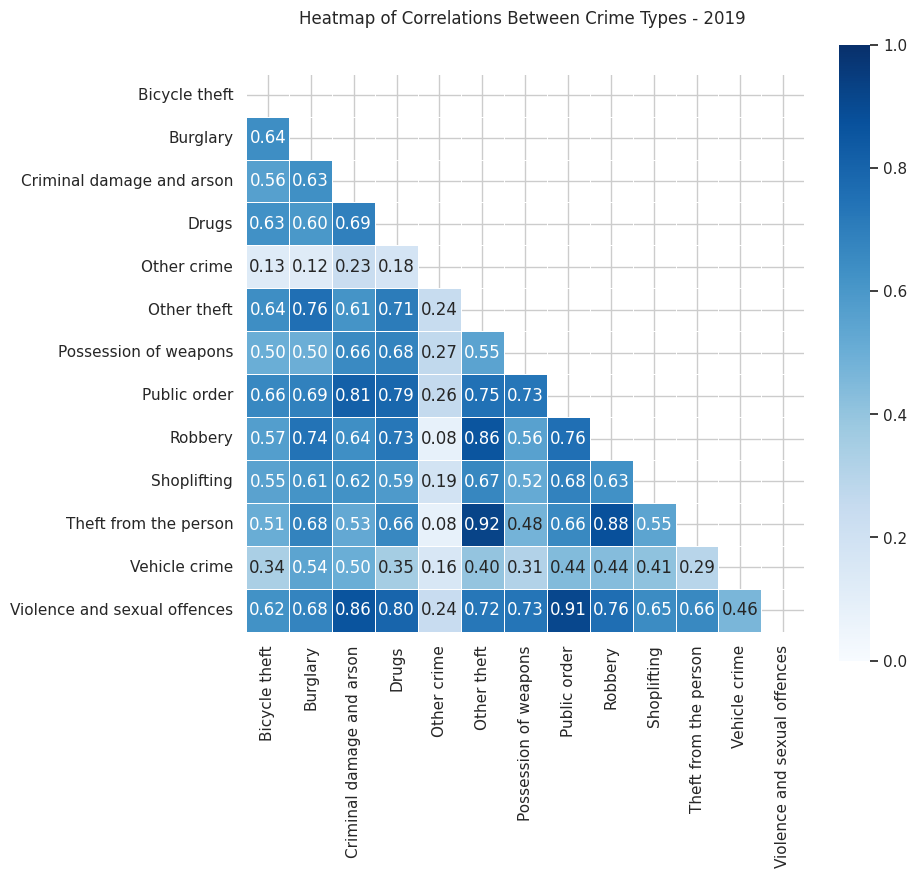

In [ ]:
sns.set_theme(style="whitegrid")
mask = np.triu(np.ones_like(corrMatrix_2019, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 8), facecolor='w')
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(260, 30, s=100, center='light', as_cmap=True)
cmap = sns.color_palette("Blues", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix_2019, mask=mask, cmap=cmap, vmin=0, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": 1.0}, annot=True, fmt=".2f"
            )

ax.set_title('Heatmap of Correlations Between Crime Types - 2019 \n\n')
ax.set_xlabel('')
ax.set_ylabel('');

## 2013

In [ ]:
crime_type_totals_2013 = df_2013.groupby(['LSOA_name','type']).size().reset_index(name='count')
crime_type_totals_2013.head()

,LSOA_name,type,count
0,Barking and Dagenham 001A,Bicycle theft,1
1,Barking and Dagenham 001A,Burglary,18
2,Barking and Dagenham 001A,Criminal damage and arson,28
3,Barking and Dagenham 001A,Drugs,10
4,Barking and Dagenham 001A,Other crime,2


In [ ]:
crime_data_pivot_2013 = crime_type_totals_2013.pivot_table(index='LSOA_name',
                     columns='type', values='count', aggfunc = 'sum')
crime_data_pivot_2013.head()

type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
LSOA_name,,,,,,,,,,,,,
Barking and Dagenham 001A,1.0,18.0,28.0,10.0,2.0,23.0,NaN,7.0,3.0,2.0,4.0,34.0,53.0
Barking and Dagenham 001B,3.0,8.0,10.0,4.0,1.0,5.0,NaN,6.0,2.0,NaN,1.0,11.0,27.0
Barking and Dagenham 001C,NaN,57.0,12.0,8.0,1.0,11.0,NaN,2.0,5.0,1.0,NaN,28.0,28.0
Barking and Dagenham 001D,NaN,9.0,14.0,1.0,1.0,7.0,NaN,3.0,4.0,13.0,1.0,41.0,30.0
Barking and Dagenham 002A,NaN,31.0,7.0,4.0,1.0,13.0,NaN,2.0,2.0,NaN,NaN,31.0,23.0


In [ ]:
corrMatrix_2013 = crime_data_pivot_2013.corr()
corrMatrix_2013

type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
type,,,,,,,,,,,,,
Bicycle theft,1.000000,0.544562,0.506841,0.498142,0.366279,0.648222,0.228088,0.524463,0.440284,0.544995,0.548194,0.399105,0.561917
Burglary,0.544562,1.000000,0.532597,0.447675,0.358776,0.651292,0.220932,0.482538,0.570113,0.468982,0.610950,0.565315,0.552130
Criminal damage and arson,0.506841,0.532597,1.000000,0.595654,0.440397,0.592593,0.437769,0.720226,0.589843,0.546109,0.531818,0.424298,0.810776
Drugs,0.498142,0.447675,0.595654,1.000000,0.371545,0.682079,0.408766,0.732064,0.655129,0.421777,0.691249,0.290773,0.739407
Other crime,0.366279,0.358776,0.440397,0.371545,1.000000,0.569474,0.658773,0.482919,0.348673,0.463031,0.358462,0.354079,0.480188
Other theft,0.648222,0.651292,0.592593,0.682079,0.569474,1.000000,0.437309,0.730422,0.746667,0.657790,0.911914,0.461385,0.733374
Possession of weapons,0.228088,0.220932,0.437769,0.408766,0.658773,0.437309,1.000000,0.521239,0.328897,0.284991,0.312100,0.191026,0.468314
Public order,0.524463,0.482538,0.720226,0.732064,0.482919,0.730422,0.521239,1.000000,0.692919,0.565573,0.690097,0.322768,0.867133
Robbery,0.440284,0.570113,0.589843,0.655129,0.348673,0.746667,0.328897,0.692919,1.000000,0.485228,0.788817,0.414954,0.749347


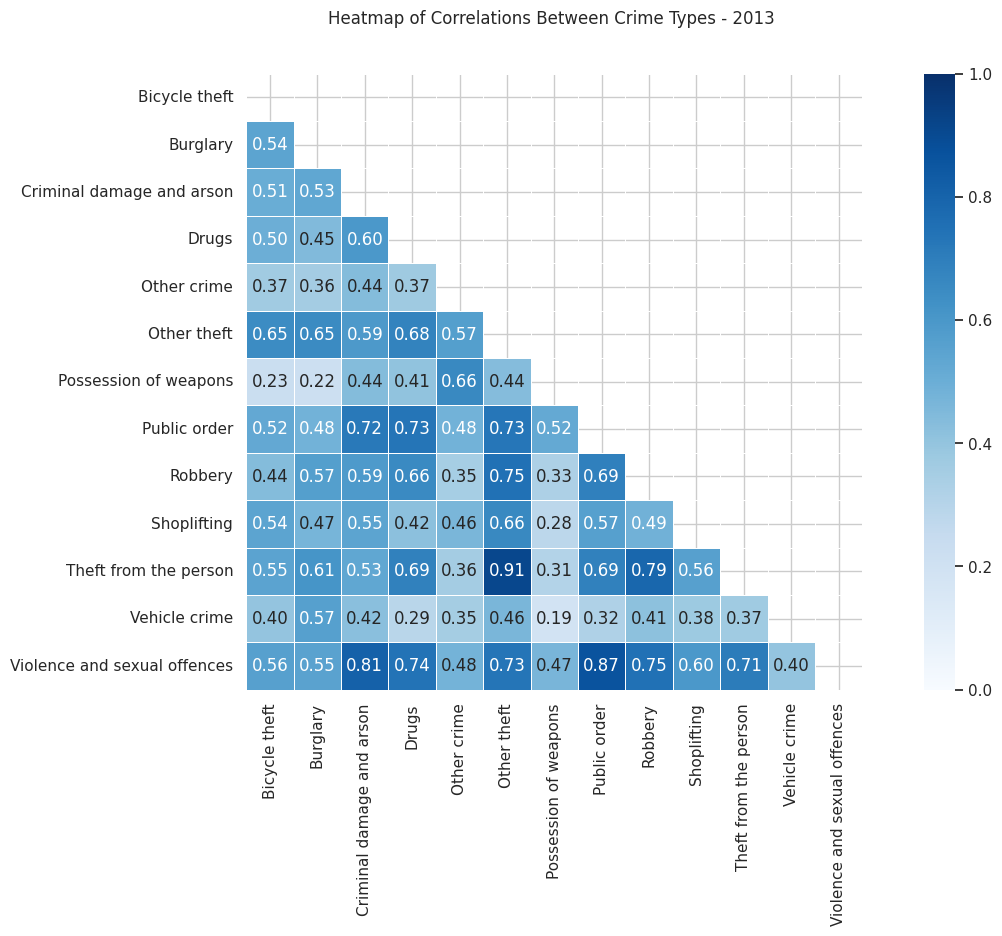

In [ ]:
sns.set_theme(style="whitegrid")
mask = np.triu(np.ones_like(corrMatrix_2013, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8), facecolor='w')
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(260, 30, s=100, center='light', as_cmap=True)
cmap = sns.color_palette("Blues", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatrix_2013, mask=mask, cmap=cmap, vmin=0, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": 1.0}, annot=True, fmt=".2f"
            )

ax.set_title('Heatmap of Correlations Between Crime Types - 2013 \n\n')
ax.set_xlabel('')
ax.set_ylabel('');

# Fatto per progetto 2022

## Indici

https://www4.istat.it/it/files/2015/11/Rapporto_sicurezza.pdf 

In [ ]:
num_inhabitants = 9541000

In [ ]:
num_fam = 28312 # https://www.ibisworld.com/uk/bed/number-of-households/44090/

In [ ]:
crime_data_group = df_2022.groupby('type').size().reset_index(name='count')
crime_data_group

,type,count
0,Anti-social behaviour,255614
1,Bicycle theft,18657
2,Burglary,51947
3,Criminal damage and arson,53794
4,Drugs,41089
5,Other crime,10971
6,Other theft,123923
7,Possession of weapons,5083
8,Public order,60124
9,Robbery,27200


### Tasso furti in abitazione (`Burglary`)

(num furti)/(famiglie * 100^2)

In [ ]:
num_Burglary = crime_data_group[crime_data_group["type"] == "Burglary"]
num_Burglary

,type,count
2,Burglary,51947


In [ ]:
(num_Burglary["count"]/(num_fam*100))

2    0.018348
Name: count, dtype: float64

### Tasso borseggi (```Theft from the person```)

(num borseggi)/(individui * 100)

In [ ]:
num_TheftPerson = crime_data_group[crime_data_group["type"] == "Theft from the person"]
num_TheftPerson

,type,count
11,Theft from the person,61532


In [ ]:
(num_TheftPerson["count"]/(num_inhabitants*100))

11    0.000064
Name: count, dtype: float64

### Tasso rapine (`Robbery`)

(num rapine)/(individui * 100)

In [ ]:
num_Robbery = crime_data_group[crime_data_group["type"] == "Robbery"]
num_Robbery

,type,count
9,Robbery,27200


In [ ]:
(num_Robbery["count"]/(num_inhabitants*100))

9    0.000029
Name: count, dtype: float64

## prova heatmap

Heatmap

La mappa coropletica mostra aree geografiche divise o regioni che sono colorate rispetto a una variabile numerica. Ci permette di studiare come la variabile evolve insieme a un territorio.

Usiamo la funzione in Folium per generare la heatmap del crimine. Questo non richiede Dataframes. Dovrai fornirgli una lista di lats, lons, cioè una lista di liste. Anche i NaN lo faranno inciampare.

In [ ]:
import webbrowser
import branca.colormap as cm
from collections import defaultdict

In [ ]:
# Ensure you're handing it floats
df_2022['lat'] = df_2022['lat'].astype(float)
df_2022['lon'] = df_2022['lon'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_2022[['lat', 'lon']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lon'])

# List comprehension to make out list of lists
heat_data = [[row['lat'],row['lon']] for index, row in heat_df.iterrows()]

heatmap_map = folium.Map([51.50632, -0.1271448], zoom_start=12)

steps=20
#colormap = cm.linear.YlOrRd_09.scale(0, 1).to_step(steps)
#colormap = cm.linear.YlOrRd_09.scale(0, 10).to_step(20)
#colormap = cm.LinearColormap(['yellow', 'green', 'purple']).scale(0, 2).to_step(20)
colormap = cm.step.RdYlBu_11.to_linear().scale(0, 2)
colormap.caption = 'Color scale'
gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
colormap.add_to(heatmap_map) #add color bar at the top of the map

# Plot it on the map
hm=plugins.HeatMap(heat_data, gradient = gradient_map).add_to(heatmap_map) # Add heat map to the previously created map)
heatmap_map.add_child(hm)
# You save a map as an html file 
heatmap_map.save("heatmap.html")
#webbrowser.open("/content/heatmap.html") # Default browser open

Hotspots Detection

Per rilevare gli hotspot, il primo passo è calcolare quanti casi di crimine si sono verificati in ogni LSOA, questa operazione è simile all'operazione "Punti nel poligono" in QGIS.

In [ ]:
# calculating total number of crime incidents per lsoa
crime_data2 = pd.DataFrame(df_2022['LSOA_code'].value_counts().astype(float))
crime_data2 = crime_data2.reset_index()
crime_data2.columns = ['LSOA_code','Numbers']
crime_data2.head(4)

,LSOA_code,Numbers
0,E01033595,11712.0
1,E01004734,10234.0
2,E01004763,9411.0
3,E01032739,6267.0


In [ ]:
# add a new column of crime incidents number in each lsoa 
# by join lsoa and crime_data2 through attribute join
lsoa = shapefile.merge(crime_data2, on='LSOA_code')
# save this newly joined .csv file into .shp file
lsoa.to_file(driver='ESRI Shapefile', filename='lsoa_numbers.shp')

<Axes: >

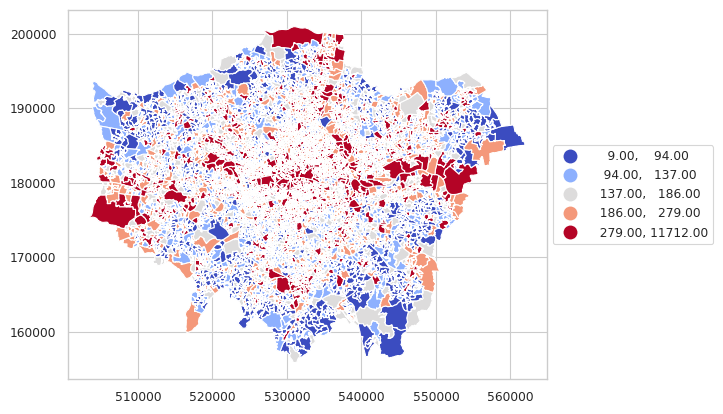

In [ ]:
# Make a Choropleth map on crime incidents per lsoa.
lsoa.plot(column='Numbers', cmap='coolwarm',
          scheme='quantiles', legend=True,
          legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})